In [1]:
import numpy as np 
from matplotlib.pylab import plt
from scipy.integrate import odeint

G = 6.673e-11
M = 5.97e24
R = 6371e3

def RK4(f, init, t):
    N = len(t)
    r = np.zeros((N,4))
    r[0,:] = init
    h = t[1] - t[0]


    for i in range(N-1):
        k1 = h*f(r[i,:],t[i])
        k2 = h*f(r[i,:]+k1/2, t[i]+h/2)
        k3 = h*f(r[i,:]+k2/2, t[i]+h/2)
        k4 = h*f(r[i,:]+k3, t[i+1])

        r[i+1,:] = r[i,:] + (k1 + 2*k2 + 2*k3 + k4)/6
    return r

def F(var, t):
    
    x = var[0]
    y = var[1]
    vx = var[2]
    vy = var[3]
    d = np.sqrt(x**2 + y**2)
    
    return np.array([vx, vy, -G*x*M/d**3, -G*y*M/d**3])


init = [R, 0.0, 0.0, np.sqrt(G*M/R)] #x,y,vx,vy

In [2]:
def Orbit(r):
    if r >= R:
        o_vel = np.sqrt(G*M/r)
        T = (2*np.pi*r)/o_vel
        return o_vel, T #Orbital Velocity in km/s and Period in hours
    else:
        print('Invalid R')
        
vel, time = Orbit(R)
        
print(f'Orbital Speed is {vel/1000} km/s and Period is {time/3600} hours')

Orbital Speed is 7.907586029285283 km/s and Period is 1.406180422606277 hours


The Rockets Initial Velocity is 11.09131468189963 km/s
The voyage takes approximately 9.92 days


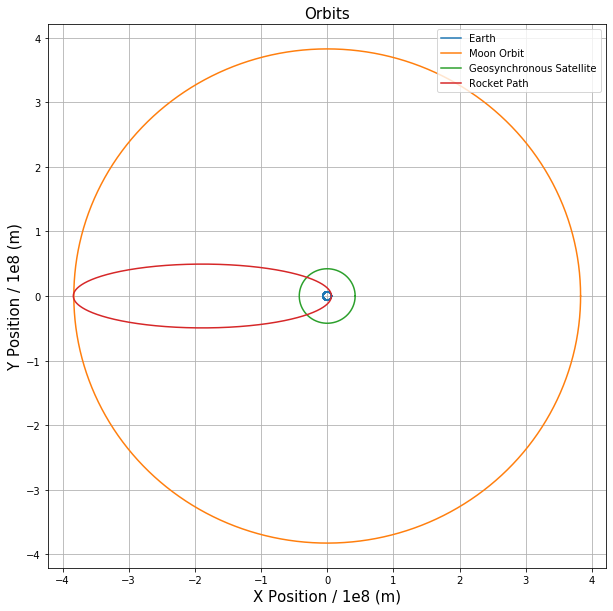

In [3]:
N = 1000
TP = np.linspace(0, 10 * Orbit(R)[1], N)

Earth = RK4(F, init, TP)

fig1 = plt.figure(figsize=(10,10));
plt.title('Orbits', fontsize=15)
plt.xlabel('X Position / 1e8 (m)', fontsize = 15)
plt.ylabel('Y Position / 1e8 (m)', fontsize = 15)
plt.plot(Earth[:,0]/1e8, Earth[:,1]/1e8, label = 'Earth')


TP_Moon = np.linspace(0, 27.3*86400, N)
R_Moon = ((G*M*(27.3*86400)**2)/(4*np.pi**2))**(1/3) #Radius of Moon Orbit, not radius of the moon
Vel_Moon = Orbit(R_Moon)[0]
init_Moon = [R_Moon, 0.0, 0.0, Vel_Moon]

Moon = RK4(F, init_Moon, TP_Moon)
plt.plot(Moon[:,0]/1e8, Moon[:,1]/1e8, label = 'Moon Orbit')

TP_GeoS = np.linspace(0, 86400, N)                     
GeoS_R = ((G*M*(86400)**2)/(4*np.pi**2))**(1/3) #Radius of Geosynchronous satellite orbit
Vel_GeoS = Orbit(GeoS_R)[0]
init_GeoS = [GeoS_R, 0.0, 0.0, Vel_GeoS]

GeoS = RK4(F, init_GeoS, TP_GeoS)
plt.plot(GeoS[:,0]/1e8, GeoS[:,1]/1e8, label = 'Geosynchronous Satellite')

TP_Rocket = np.linspace(0, 9.92 * 86400, 10 * N)
Vel_Rocket = 0.9918 * np.sqrt(2*G*M/R) #Using .9918 of escape velocity since we want the rocket to go back to Earth
init_Rocket = [R, 0.0, 0.0, Vel_Rocket]

Rocket = RK4(F, init_Rocket, TP_Rocket)
plt.plot(Rocket[:,0]/1e8, Rocket[:,1]/1e8, label = 'Rocket Path')

plt.grid(True)
plt.legend()

print(f'The Rockets Initial Velocity is {Vel_Rocket/1000} km/s')
print(f'The voyage takes approximately 9.92 days')

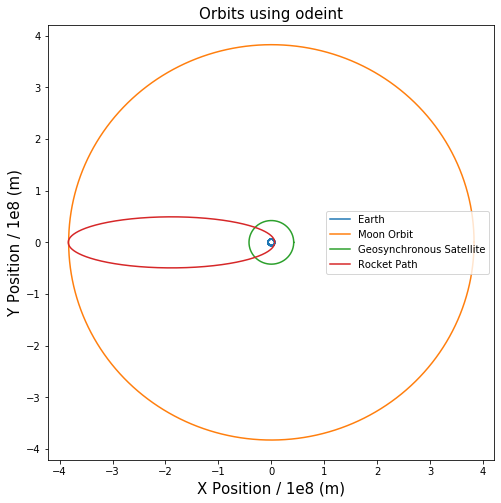

In [4]:
#Using Built in function odeint

fig2 = plt.figure(figsize=(8,8));
plt.title('Orbits using odeint', fontsize=15)
plt.xlabel('X Position / 1e8 (m)', fontsize = 15)
plt.ylabel('Y Position / 1e8 (m)', fontsize = 15)

Earth2 = odeint(F, init, TP)
plt.plot(Earth2[:,0]/1e8, Earth2[:,1]/1e8, label = 'Earth')

Moon2 = odeint(F, init_Moon, TP_Moon)
plt.plot(Moon2[:,0]/1e8, Moon2[:,1]/1e8, label = 'Moon Orbit')

GeoS2 = odeint(F, init_GeoS, TP_GeoS)
plt.plot(GeoS2[:,0]/1e8, GeoS2[:,1]/1e8, label = 'Geosynchronous Satellite')


Rocket2 = odeint(F, init_Rocket, TP_Rocket)
plt.plot(Rocket2[:,0]/1e8, Rocket2[:,1]/1e8, label = 'Rocket Path')

plt.legend()

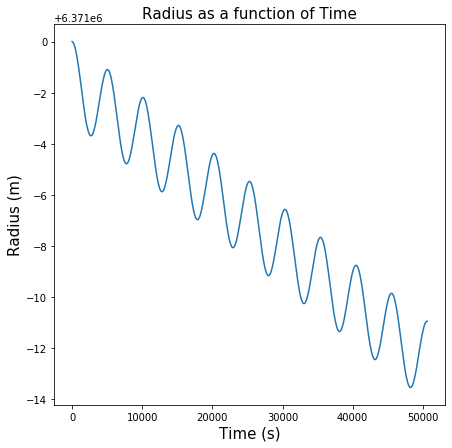

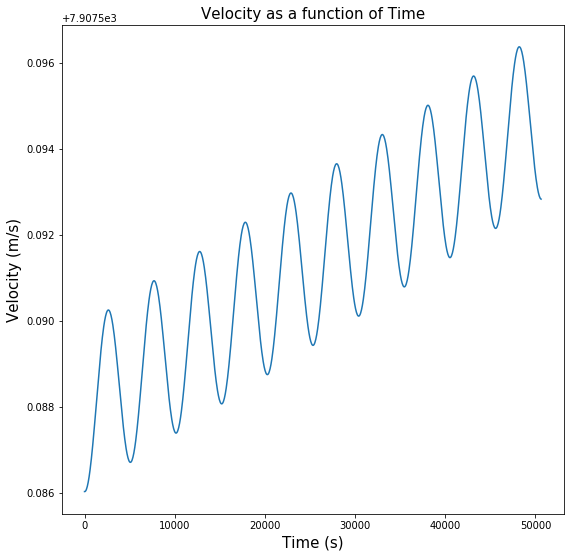

In [5]:
fig3 = plt.figure(figsize=(7,7));
plt.title('Radius as a function of Time', fontsize=15)
plt.xlabel('Time (s)', fontsize = 15)
plt.ylabel('Radius (m)', fontsize = 15)
plt.plot(TP, np.sqrt(Earth[:,0]**2 + Earth[:,1]**2))

fig4 = plt.figure(figsize=(9,9));
plt.title('Velocity as a function of Time', fontsize=15)
plt.xlabel('Time (s)', fontsize = 15)
plt.ylabel('Velocity (m/s)', fontsize = 15)
plt.plot(TP, np.sqrt(Earth[:,2]**2 + Earth[:,3]**2))